<a href="https://colab.research.google.com/github/JoungMinJu/machine_learning/blob/main/6%EC%9E%A5/%EA%B5%B0%EC%A7%91%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

과일 사진을 분류하기

In [ ]:
#데이터는 사과, 바나나, 파인애플을 담고 있ㄴ느 흑백사진!!!!!!!! 넘파이 배열의 기본 저장 포맷인 npy 파일로 저장되어있다. 


In [2]:
!wget https://bit.ly/fruits_300 -O fruits_300.npy

#wget은 원격 주소에서 데이터를 다운하여 저장한다는 것 ! -O 옵션에서 저장할 파일의 이름을 지정할 수 있다.

--2021-07-24 08:23:25--  https://bit.ly/fruits_300
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy [following]
--2021-07-24 08:23:25--  https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy
Resolving github.com (github.com)... 13.114.40.48
Connecting to github.com (github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy [following]
--2021-07-24 08:23:26--  https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443..

In [3]:
import numpy as np
import matplotlib.pyplot as plt

fruits=np.load('fruits_300.npy')

In [4]:
print(fruits.shape)

#샘플의 개수, 이미지 높이, 이미지 너비!!!

(300, 100, 100)


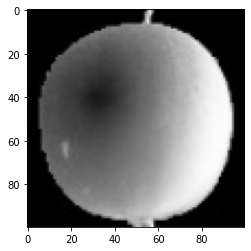

In [5]:
#이미지그리기
plt.imshow(fruits[0],cmap='gray')
#흑백이미지라 gray
plt.show()

In [ ]:
#이 이미지는 사진으로 찍은 이미지를 넘파이 배려로 변환할 때 반전시킨 것이다. 배경이 까맣게 나오는 것으로 보아 확인할 수 있다.
#관심의 대상이 사과이므로 !!

#1에 가까울수록 픽셀 밝기가 밝아진다.흰색에 가까워진다.

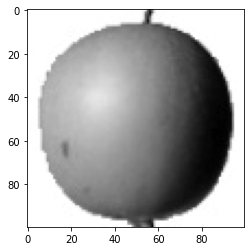

In [7]:
#다시 반전시켜보기
plt.imshow(fruits[0], cmap='gray_r')
plt.show()

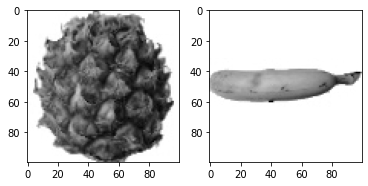

In [8]:
fig, axs=plt.subplots(1,2)

#subplot 사용하면 여러개의 그래프를 배열처럼 쌓을 수 있도록 도와준다. 두 매개변수는 그래프를 쌓을 행과 열을 지정하는 것입니다.
#반환된 axs는 2개의 서브그래프를 담고 있는 배열이다. 

axs[0].imshow(fruits[100], cmap="gray_r")
axs[1].imshow(fruits[200], cmap='gray_r')
plt.show()


#이 데이터의 처음 100개는 사과, 두번째 100개는 파인애플 세번쨰 100개는 바나나입니다.


In [10]:
#100*100 이미지를 길이가 10,000인 1차원 배열로 만들겠다. 

#슬라이싱으로 100개씩 선택하고 reshape()사용해 두번째 차우너과 세번째 차원을 10,000으로 합친다.
#첫 번쨰 차원을 -1 로 지정하면 자동으로 남은 차원을 할당한다. 여기서는 첫 번쨰 차원이 샘ㅁ플의 개수이다.

In [13]:
apple=fruits[:100].reshape(-1,100*100)
pineapple=fruits[100:200].reshape(-1,100*100)
banana=fruits[200:300].reshape(-1,100*100)

In [14]:
print(apple.shape)

(100, 10000)


In [ ]:
#샘플의 픽셀 평균값을 계산해보자. 넘파이 mean()메서드를 사용할 ㅅ것!! 샘플마다 픽셀의 평균값을 계싼해야하므로 축을 지정해줘야한다.
#axis=0을 하면ㅅ 첫번째 축인 행을 따라 계산한다. 

#샘플의 평균값이 필요한데, 우리는 샘플을 모두 가로로 값을 나열했음. 따라서 axis=1!
#np.mean()사용해도 되는데 넘파이 배열이 mean()메서드를 제공하므로 이걸 사용하겠음


In [15]:
print(apple.mean(axis=1))

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


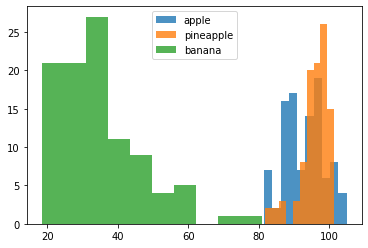

In [18]:
#히스토그램을 그려봅시다.
#사과 파인애플 바나나 다 겹쳐서 그리겠음. alpha를 1보다 작게 만들면 투명도를 줄 수 있음 그리고 legend()함수를 사용해 범례 만들 것

plt.hist(np.mean(apple, axis=1), alpha=0.8)
plt.hist(np.mean(pineapple, axis=1), alpha=0.8)
plt.hist(np.mean(banana, axis=1),alpha=0.8)
plt.legend(['apple','pineapple','banana'])
plt.show()

In [ ]:
# 바나나 사진의 평균값은 40에 집중
# 사과 파인애플은 90~100에 집중

#바나나는 걍 쉽게 구분할 수 있겠구나. 사진에 차지하는 영역이 작아서 평균값이 작구나


#사과랑 파인애플은 어쩌지?? 그럼 샘플의 평균값이 아니라 픽셀별 평균값을 비교해보자
#전체 샘플에 대해 각 픽셀의 평균을 계산하는 것!! 세 과일은 모야이 다르므로 픽셀값이 높은 위치가 조금 다를 것 같다.

#픽셀의 평균을 계산하는 것은 axis=0



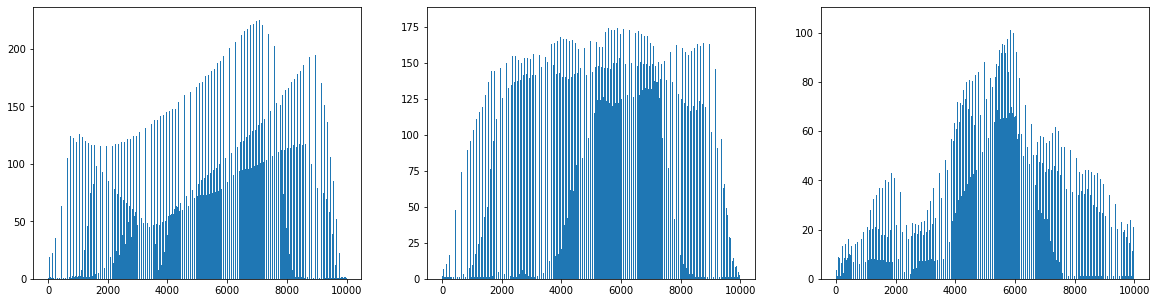

In [19]:
#막대그래프로 그리겠음

fig, axs=plt.subplots(1,3,figsize=(20,5))
axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].bar(range(10000), np.mean(pineapple, axis=0))
axs[2].bar(range(10000), np.mean(banana, axis=0))
plt.show()

In [ ]:
#사과는 사진 아래쪽으로 갈수록 값이 높아지고
#파인애플은 비교적 고르게 높고
#바나나는 중앙의 픽셀값이 높다


#픽셀 평균값을 100*100 크기로 바꿔서 이미지처럼 출력해보자 (픽셀을 평균낸 이미지를 모든 사진을 합쳐놓은 대표이미지로 생각할 수 있다.)

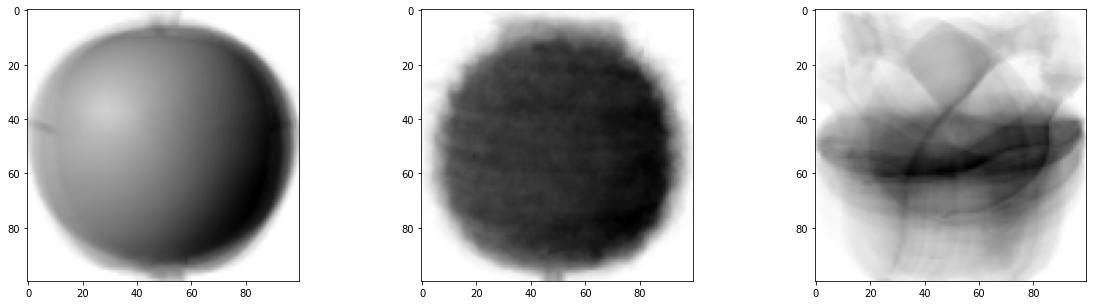

In [20]:
apple_mean=np.mean(apple, axis=0).reshape(100,100)
pineapple_mean=np.mean(pineapple, axis=0).reshape(100,100)
banana_mean=np.mean(banana, axis=0).reshape(100,100)

fig, axs=plt.subplots(1,3,figsize=(20,5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')

사과사진의 평균값인 apple_mean이란 가장 가까운 사진을 고르겠다. 절댓값 오차를 사용하겠다!!
fruits 배열에 있는 모든 샘플에서 apple_mean을 뺀 절댓값의 평균을 계산하면 된다.



In [21]:
abs_diff=np.abs(fruits - apple_mean)
#얘는 (300,100,100)의 배열입니다.

abs_mean=np.mean(abs_diff, axis=(1,2))
#따라서 각 샘플에 대한 평균을 구하기 위해 두 번째, 세 번째 차언을 모두 지정.

print(abs_mean.shape)

(300,)


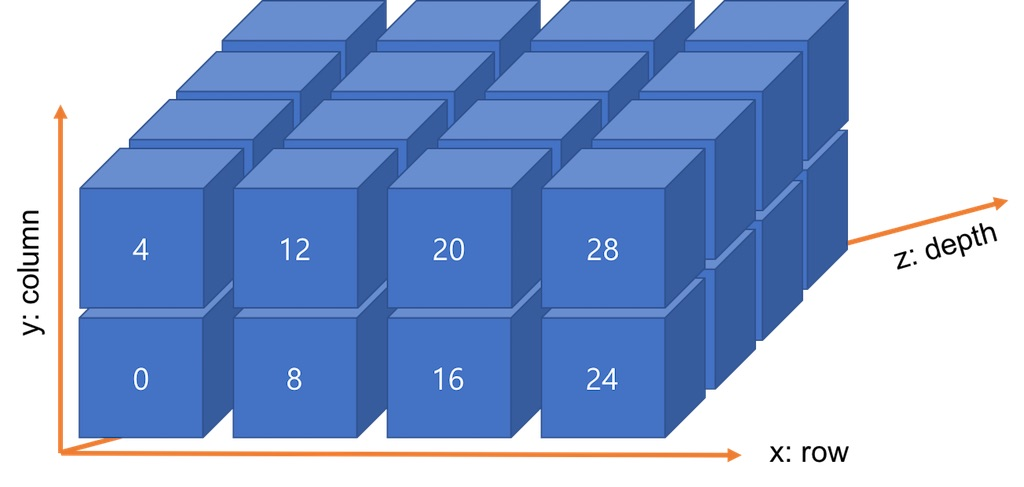

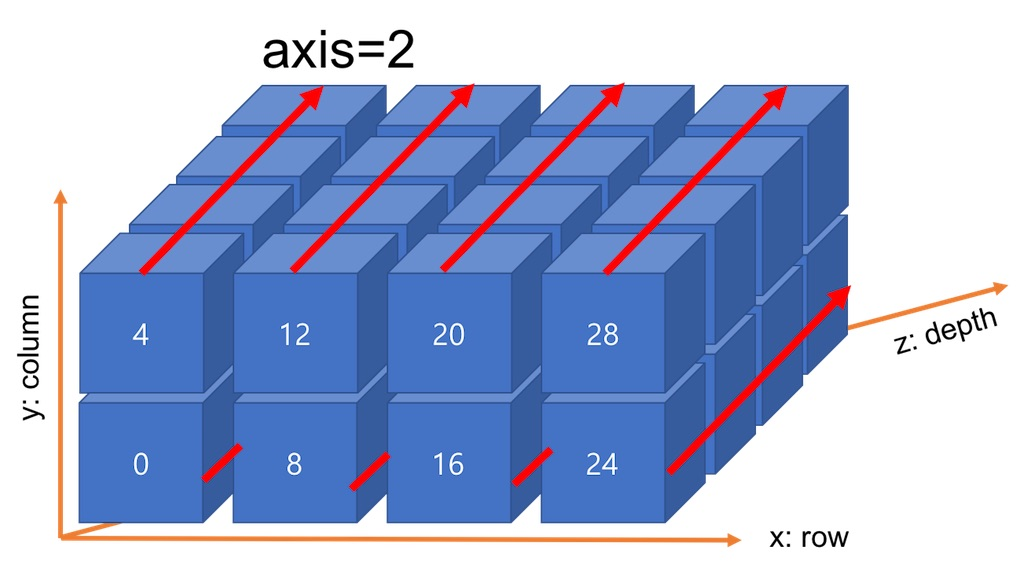

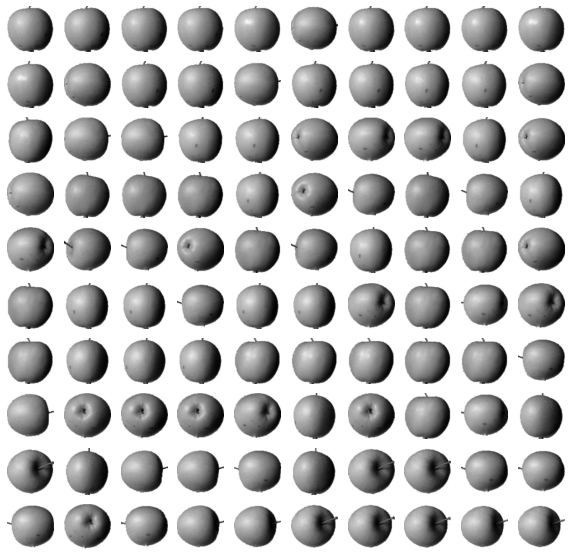

In [22]:
apple_index=np.argsort(abs_mean)[:100]
#np.argsort는 작은 것에서 큰 순서대로 나여한 abs_mean()배열의 인덱스를 반환한다! 이 중 처음 100개를 선택해 10*10 격자로 이루어진 그래프 그릴 것

fig, axs= plt.subplots(10,10,figsize=(10,10))
for i in range(10):
  for j in range(10):
    axs[i,j].imshow(fruits[apple_index[i*10+j]],cmap='gray_r')
    axs[i,j].axis('off') #좌표축을 그리지 않음
plt.show()

이런게 군집입니당
비지도학습의 대표적임. 군집 알고리즘에서 만든 그룹을 클러스터라고 한다.

근데 우리는 이미 사과, 파인애플, 바나나가 있다는 타깃값을 알고있었음. 근데 실제 비지도 학습에서는 이것을 모르기 때문에 샘플의 평균값을 미리 구할 수 없다. 
이는 k-평균 알고리즘이 해결해준다.